In [1]:
# Import Dependencies
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#!pip install --upgrade scikit-learn


In [3]:
import sklearn
print(sklearn.__version__)

1.4.2


In [4]:
df = pd.read_excel('newone.xlsx')

In [5]:
df.head()

,id,nom,cin,marier,Travaille-conjoint,avez_des_enfants,louer_ou_proprieter,employer,titulaire,salaire,...,num tel,adress,in_out_sfax,garant,produit,prix kenbyel,Qte kenbyel,avance,date vente,class
0,1457,لسعد بن علي بن منصور برابر,8831540.0,oui,oui,non,l,oui,non,880.0,...,27716955,NaN,i,حمادي عزيزة برابر,portable,NaN,NaN,0.0,NaT,a
1,1458,فتحي بن الفيتوري بن محمد بخيطي,3247470.0,oui,non,non,l,oui,oui,360.0,...,22673419,طريق الطبلبي مدخل بوجلبان,i,حمادي بوقشة,refregerateure orient,90.0,11.0,0.0,NaT,r
2,1459,نبيهة بن محمد بن علي عزيزي,7552527.0,oui,oui,oui,p,non,non,340.0,...,NaN,طريق تنيور كم 12 عرفات,i,حمادي بوقشة,portable,109.0,6.0,0.0,NaT,r
3,1460,أشرف بن محمد النيفر,NaN,divorcer,non,oui,l,oui,oui,640.0,...,NaN,طريق تنيور 20 مارس,i,حمادي بوقشة,portable,100.0,6.0,0.0,NaT,a
4,1461,المبروك البدراني,NaN,oui,non,oui,l,oui,non,720.0,...,NaN,طريق تنيور كم 12 عرفات,i,حمادي بوقشة,congelateur,100.0,10.0,0.0,NaT,a


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   284 non-null    int64         
 1    nom                 284 non-null    object        
 2   cin                  215 non-null    float64       
 3   marier               284 non-null    object        
 4   Travaille-conjoint   284 non-null    object        
 5   avez_des_enfants     284 non-null    object        
 6   louer_ou_proprieter  276 non-null    object        
 7   employer             271 non-null    object        
 8   titulaire            271 non-null    object        
 9   salaire              272 non-null    float64       
 10  déjà_client          284 non-null    object        
 11  num tel              240 non-null    object        
 12  adress               257 non-null    object        
 13  in_out_sfax          258 non-null  

In [7]:
df.isna().sum()

id                       0
 nom                     0
cin                     69
marier                   0
Travaille-conjoint       0
avez_des_enfants         0
louer_ou_proprieter      8
employer                13
titulaire               13
salaire                 12
déjà_client              0
num tel                 44
adress                  27
in_out_sfax             26
garant                   0
produit                 25
prix kenbyel             5
Qte kenbyel              5
avance                   2
date vente             252
class                    0
dtype: int64

# Eda

### features marier , Sa femme ou son homme travaille ,a de enfant

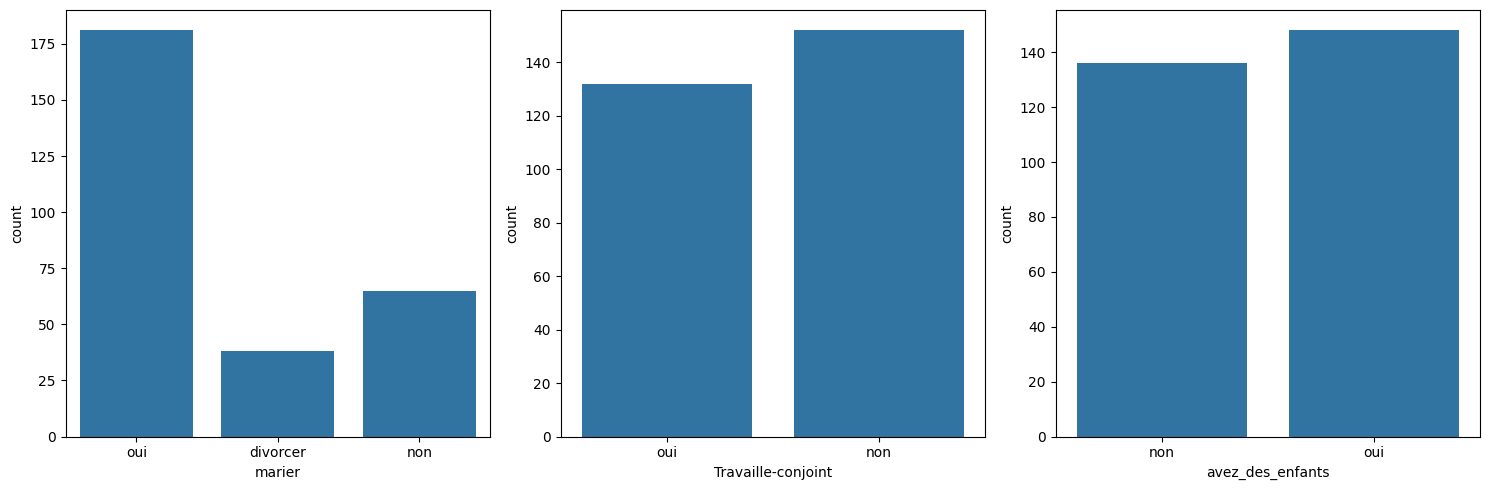

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x="marier", data=df, ax=axes[0])
sns.countplot(x="Travaille-conjoint", data=df, ax=axes[1])
sns.countplot(x="avez_des_enfants", data=df, ax=axes[2])
plt.tight_layout()
plt.show()

### features  louer ou proprieter ,employer ,titulaire,

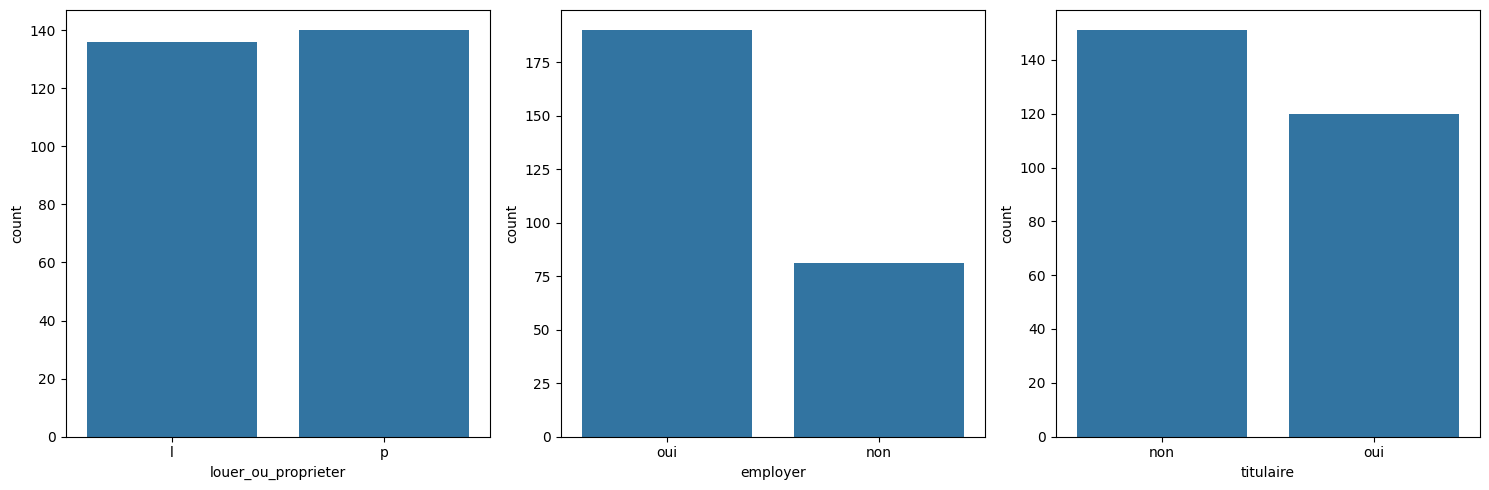

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x="louer_ou_proprieter", data=df, ax=axes[0])
sns.countplot(x="employer", data=df, ax=axes[1])
sns.countplot(x="titulaire", data=df, ax=axes[2])
plt.tight_layout()
plt.show()

### features salaire    


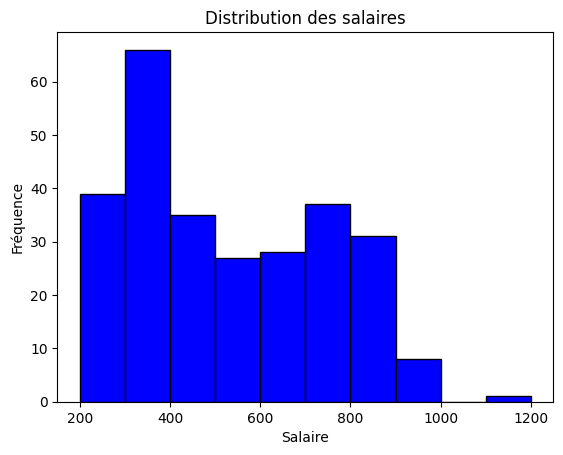

In [10]:
salaires = df['salaire'].tolist()
plt.hist(salaires, bins=10, color='blue', edgecolor='black')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')
plt.title('Distribution des salaires')
plt.show()

### features a un credit en train , deja acheter de notre magasin ,regulier

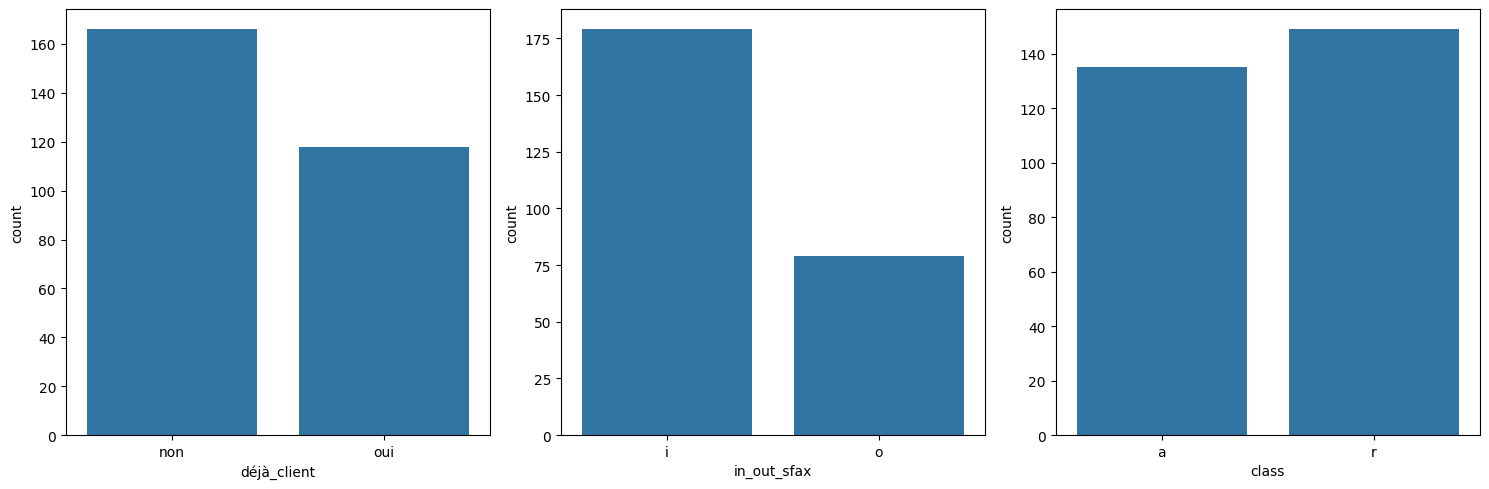

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x="déjà_client", data=df, ax=axes[0])
sns.countplot(x="in_out_sfax", data=df, ax=axes[1])
sns.countplot(x="class", data=df, ax=axes[2])
plt.tight_layout()
plt.show()

# Preprocessing

In [12]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Imputer les valeurs manquantes dans la colonne 'salaire'
imputer = SimpleImputer(strategy='mean')
df['salaire'] = imputer.fit_transform(df[['salaire']])

kmeans = KMeans(n_clusters=3)
df['salaire_group'] = kmeans.fit_predict(df[['salaire']])
print(df.groupby('salaire_group')['salaire'].describe())

               count        mean        std    min    25%    50%    75%  \
salaire_group                                                             
0              125.0  323.440000  67.227395  200.0  270.0  330.0  380.0   
1               78.0  807.692308  80.322775  690.0  750.0  800.0  850.0   
2               81.0  559.702251  65.821507  450.0  510.0  560.0  610.0   

                  max  
salaire_group          
0               440.0  
1              1200.0  
2               680.0  


In [13]:
# Imputer les valeurs manquantes dans la colonne 'prix kenbyel'
imputer = SimpleImputer(strategy='mean')
df['prix kenbyel'] = imputer.fit_transform(df[['prix kenbyel']])

kmeans = KMeans(n_clusters=3)
df['kenbyel_group'] = kmeans.fit_predict(df[['prix kenbyel']])
print(df.groupby('kenbyel_group')['prix kenbyel'].describe())

               count         mean         std    min     25%     50%     75%  \
kenbyel_group                                                                  
0              258.0   124.463428   43.481056   48.0   100.0   114.0   150.0   
1                5.0  1300.000000  334.009730  950.0  1100.0  1250.0  1375.0   
2               21.0   428.119048  121.567050  300.0   307.0   400.0   500.0   

                  max  
kenbyel_group          
0               254.0  
1              1825.0  
2               700.0  


In [14]:
# Imputer les valeurs manquantes dans la colonne 'Qte kenbyel'
imputer = SimpleImputer(strategy='mean')
df['Qte kenbyel'] = imputer.fit_transform(df[['Qte kenbyel']])

kmeans = KMeans(n_clusters=3)
df['Qte_group'] = kmeans.fit_predict(df[['Qte kenbyel']])
print(df.groupby('Qte_group')['Qte kenbyel'].describe())

           count       mean       std   min   25%   50%   75%   max
Qte_group                                                          
0          105.0   4.209524  2.078716   1.0   3.0   4.0   6.0   7.0
1           74.0  23.175676  3.369314  18.0  20.0  24.0  25.5  32.0
2          105.0  11.322922  2.353605   8.0  10.0  11.0  13.0  17.0


In [15]:
#changement des valeurs NaN dans la colonne employer par les valeurs les plus fréquentes
mostfreq = df['employer'].mode().iloc[0]
leastfreq = df['employer'].value_counts().idxmin()
df['employer'] = df['employer'].fillna(leastfreq)

#df['employer'] = df['employer'].bfill(inplace = True)

In [16]:
#changement des valeurs NaN dans la colonne avance par les valeurs les plus fréquentes
#mostfreq = df['avance'].mode().iloc[0]
#df['avance'] = df['avance'].fillna(method="ffill", inplace = True)

# Imputer les valeurs manquantes dans la colonne 'salaire'
imputer = SimpleImputer(strategy='mean')
df['avance'] = imputer.fit_transform(df[['avance']])

kmeans = KMeans(n_clusters=3)
df['Avance_group'] = kmeans.fit_predict(df[['avance']])
print(df.groupby('Avance_group')['avance'].describe())

              count        mean         std    min    25%    50%    75%  \
Avance_group                                                              
0             260.0   16.995908   46.077878    0.0    0.0    0.0    0.0   
1              17.0  451.764706   99.009803  250.0  400.0  500.0  500.0   
2               7.0  785.714286  102.933173  700.0  725.0  750.0  800.0   

                 max  
Avance_group          
0              200.0  
1              600.0  
2             1000.0  


In [17]:
#changement des valeurs NaN dans la colonne titulaire par les valeurs les plus fréquentes
mostfreq = df['titulaire'].mode().iloc[0]
df['titulaire'] = df['titulaire'].fillna(mostfreq)

In [18]:
#changement des valeurs NaN dans la colonne louer ou proprieter par les valeurs les plus fréquentes
mostfreq = df['louer_ou_proprieter'].mode().iloc[0]
df['louer_ou_proprieter'] = df['louer_ou_proprieter'].fillna(mostfreq)

In [19]:
#changement des valeurs NaN dans la colonne salairel par les valeurs les plus fréquentes
#mostfreq = df['salaire'].mode().iloc[0]
#df['salaire'] = df['salaire'].fillna(mostfreq)

In [20]:
#changement des valeurs NaN dans la colonne in_out_sfax par les valeurs les moins fréquentes
#mostfreq = df['in_out_sfax'].mode().iloc[0]
leastfreq = df['in_out_sfax'].value_counts().idxmin()
df['in_out_sfax'] = df['in_out_sfax'].fillna(leastfreq)

In [21]:
df

,id,nom,cin,marier,Travaille-conjoint,avez_des_enfants,louer_ou_proprieter,employer,titulaire,salaire,...,produit,prix kenbyel,Qte kenbyel,avance,date vente,class,salaire_group,kenbyel_group,Qte_group,Avance_group
0,1457,لسعد بن علي بن منصور برابر,8831540.0,oui,oui,non,l,oui,non,880.0,...,portable,167.612903,11.781362,0.0,NaT,a,1,0,2,0
1,1458,فتحي بن الفيتوري بن محمد بخيطي,3247470.0,oui,non,non,l,oui,oui,360.0,...,refregerateure orient,90.000000,11.000000,0.0,NaT,r,0,0,2,0
2,1459,نبيهة بن محمد بن علي عزيزي,7552527.0,oui,oui,oui,p,non,non,340.0,...,portable,109.000000,6.000000,0.0,NaT,r,0,0,0,0
3,1460,أشرف بن محمد النيفر,NaN,divorcer,non,oui,l,oui,oui,640.0,...,portable,100.000000,6.000000,0.0,NaT,a,2,0,0,0
4,1461,المبروك البدراني,NaN,oui,non,oui,l,oui,non,720.0,...,congelateur,100.000000,10.000000,0.0,NaT,a,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,28,رانيا بنت المهدي بن مصطفى عماري,11157980.0,oui,oui,oui,l,non,non,280.0,...,refregerateur+four,250.000000,10.000000,0.0,2022-05-17,r,0,0,2,0
280,28,رانيا بنت المهدي بن مصطفى عماري,11157980.0,oui,non,non,p,non,non,210.0,...,NaN,100.000000,1.000000,0.0,2022-05-17,r,0,0,0,0
281,29,خلود بنت عبودة بن الحبيب عربي,11020716.0,oui,oui,oui,p,oui,oui,390.0,...,mal,200.000000,3.000000,400.0,2022-05-20,r,0,0,0,1
282,29,خلود بنت عبودة بن الحبيب عربي,11020716.0,oui,non,non,l,oui,oui,760.0,...,NaN,100.000000,1.000000,0.0,2022-05-20,a,1,0,0,0


In [22]:
df.isna().sum()

id                       0
 nom                     0
cin                     69
marier                   0
Travaille-conjoint       0
avez_des_enfants         0
louer_ou_proprieter      0
employer                 0
titulaire                0
salaire                  0
déjà_client              0
num tel                 44
adress                  27
in_out_sfax              0
garant                   0
produit                 25
prix kenbyel             0
Qte kenbyel              0
avance                   0
date vente             252
class                    0
salaire_group            0
kenbyel_group            0
Qte_group                0
Avance_group             0
dtype: int64

In [23]:
df

,id,nom,cin,marier,Travaille-conjoint,avez_des_enfants,louer_ou_proprieter,employer,titulaire,salaire,...,produit,prix kenbyel,Qte kenbyel,avance,date vente,class,salaire_group,kenbyel_group,Qte_group,Avance_group
0,1457,لسعد بن علي بن منصور برابر,8831540.0,oui,oui,non,l,oui,non,880.0,...,portable,167.612903,11.781362,0.0,NaT,a,1,0,2,0
1,1458,فتحي بن الفيتوري بن محمد بخيطي,3247470.0,oui,non,non,l,oui,oui,360.0,...,refregerateure orient,90.000000,11.000000,0.0,NaT,r,0,0,2,0
2,1459,نبيهة بن محمد بن علي عزيزي,7552527.0,oui,oui,oui,p,non,non,340.0,...,portable,109.000000,6.000000,0.0,NaT,r,0,0,0,0
3,1460,أشرف بن محمد النيفر,NaN,divorcer,non,oui,l,oui,oui,640.0,...,portable,100.000000,6.000000,0.0,NaT,a,2,0,0,0
4,1461,المبروك البدراني,NaN,oui,non,oui,l,oui,non,720.0,...,congelateur,100.000000,10.000000,0.0,NaT,a,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,28,رانيا بنت المهدي بن مصطفى عماري,11157980.0,oui,oui,oui,l,non,non,280.0,...,refregerateur+four,250.000000,10.000000,0.0,2022-05-17,r,0,0,2,0
280,28,رانيا بنت المهدي بن مصطفى عماري,11157980.0,oui,non,non,p,non,non,210.0,...,NaN,100.000000,1.000000,0.0,2022-05-17,r,0,0,0,0
281,29,خلود بنت عبودة بن الحبيب عربي,11020716.0,oui,oui,oui,p,oui,oui,390.0,...,mal,200.000000,3.000000,400.0,2022-05-20,r,0,0,0,1
282,29,خلود بنت عبودة بن الحبيب عربي,11020716.0,oui,non,non,l,oui,oui,760.0,...,NaN,100.000000,1.000000,0.0,2022-05-20,a,1,0,0,0


In [24]:
colonnes_a_supprimer = ["id"," nom","cin", "num tel", "adress", "date vente" ,"garant","produit","salaire","prix kenbyel","Qte kenbyel","avance"]
df = df.drop(colonnes_a_supprimer, axis=1)


In [25]:
df

,marier,Travaille-conjoint,avez_des_enfants,louer_ou_proprieter,employer,titulaire,déjà_client,in_out_sfax,class,salaire_group,kenbyel_group,Qte_group,Avance_group
0,oui,oui,non,l,oui,non,non,i,a,1,0,2,0
1,oui,non,non,l,oui,oui,non,i,r,0,0,2,0
2,oui,oui,oui,p,non,non,oui,i,r,0,0,0,0
3,divorcer,non,oui,l,oui,oui,non,i,a,2,0,0,0
4,oui,non,oui,l,oui,non,oui,i,a,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,oui,oui,oui,l,non,non,oui,i,r,0,0,2,0
280,oui,non,non,p,non,non,non,i,r,0,0,0,0
281,oui,oui,oui,p,oui,oui,oui,i,r,0,0,0,1
282,oui,non,non,l,oui,oui,non,i,a,1,0,0,0


changement des colonnes vers le type numeric
pour "marier" 0 pour non et 1 pour oui ,
pour "Sa femme ou son homme travaille" 0 pour non et 1 pour oui,
pour "a de enfan" 0 pour non et 1 pour oui ,
pour "louer ou proprieter" 0 pour louer et 1 pour propriete ,
pour "employer" 0 pour non et 1 pour oui ,
pour "titulaire" 0 pour non et 1 pour oui ,
pour "a un credit en train" 0 pour non et 1 pour oui ,
pour "deja acheter de notre magasin" 0 pour non et 1 pour oui ,
pour "ajour-enretard(class)" 0 pour a et 1 pour r

In [26]:
df['marier'] = df['marier'].replace({'non': 0, 'oui': 1 , 'divorcer': 2 })
df['Travaille-conjoint'] = df['Travaille-conjoint'].replace({'non': 0, 'oui': 1})
df['avez_des_enfants'] = df['avez_des_enfants'].replace({'non': 0, 'oui': 1})
df['louer_ou_proprieter'] = df['louer_ou_proprieter'].replace({'l': 0, 'p': 1})
df['employer'] = df['employer'].replace({'non': 0, 'oui': 1})
df['titulaire'] = df['titulaire'].replace({'non': 0, 'oui': 1})
df['déjà_client'] = df['déjà_client'].replace({'non': 0, 'oui': 1})
df['in_out_sfax'] = df['in_out_sfax'].replace({'o': 0, 'i': 1})
df['class'] = df['class'].replace({'a': 1, 'r': 0})

In [27]:
df.head()


,marier,Travaille-conjoint,avez_des_enfants,louer_ou_proprieter,employer,titulaire,déjà_client,in_out_sfax,class,salaire_group,kenbyel_group,Qte_group,Avance_group
0,1,1,0,0,1,0,0,1,1,1,0,2,0
1,1,0,0,0,1,1,0,1,0,0,0,2,0
2,1,1,1,1,0,0,1,1,0,0,0,0,0
3,2,0,1,0,1,1,0,1,1,2,0,0,0
4,1,0,1,0,1,0,1,1,1,1,0,2,0


In [28]:
# Split the dataframe into data and labels
X = df.drop('class', axis=1)  # data
y = df['class']  # labels

In [29]:
X.head()

,marier,Travaille-conjoint,avez_des_enfants,louer_ou_proprieter,employer,titulaire,déjà_client,in_out_sfax,salaire_group,kenbyel_group,Qte_group,Avance_group
0,1,1,0,0,1,0,0,1,1,0,2,0
1,1,0,0,0,1,1,0,1,0,0,2,0
2,1,1,1,1,0,0,1,1,0,0,0,0
3,2,0,1,0,1,1,0,1,2,0,0,0
4,1,0,1,0,1,0,1,1,1,0,2,0


In [30]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: class, dtype: int64

# model


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

LogisticRegressionPipeline = make_pipeline(MinMaxScaler(), LogisticRegression())
DecisionTreePipeline = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
RandomForestPipeline = make_pipeline(MinMaxScaler(), RandomForestClassifier())
GradientBoostingPipeline = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
SGDPipeline = make_pipeline(MinMaxScaler(), SGDClassifier())
SVCPipeline = make_pipeline(MinMaxScaler(), SVC())
KNNPipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
NaiveBayesPipeline = make_pipeline(MinMaxScaler(), GaussianNB())

In [33]:
mypipelines = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline,
               GradientBoostingPipeline, SGDPipeline, SVCPipeline, KNNPipeline, NaiveBayesPipeline]

for mypipe in mypipelines:
    model = mypipe.fit(X_train, y_train)
    classifier_name = type(mypipe[-1]).__name__
    accuracy = model.score(X_test, y_test)
    print(f"Test Accuracy for {classifier_name}: {accuracy}")

Test Accuracy for LogisticRegression: 0.8591549295774648
Test Accuracy for DecisionTreeClassifier: 0.8450704225352113
Test Accuracy for RandomForestClassifier: 0.9014084507042254
Test Accuracy for GradientBoostingClassifier: 0.8732394366197183
Test Accuracy for SGDClassifier: 0.7887323943661971
Test Accuracy for SVC: 0.8591549295774648
Test Accuracy for KNeighborsClassifier: 0.8028169014084507
Test Accuracy for GaussianNB: 0.8732394366197183


### Best model

In [34]:
model=DecisionTreePipeline.fit(X_train, y_train)

model.score(X_test,y_test)

0.8591549295774648

## Evaluation

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [36]:
y_pred = model.predict(X_test)
print("Accuracy: {0:.3f}".format(accuracy_score(y_test, y_pred)))


Accuracy: 0.859


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.85      0.85      0.85        33

    accuracy                           0.86        71
   macro avg       0.86      0.86      0.86        71
weighted avg       0.86      0.86      0.86        71



In [38]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[33,  5],
       [ 5, 28]])

In [39]:
## augmentation base

In [40]:
#import pandas as pd
#from openpyxl import load_workbook
#import random

In [41]:
#def augment_data(row):
    # Example augmentation: adding noise to numerical columns
  #  for column in df.select_dtypes(include='number').columns:
   #     row[column] += random.uniform(-0.1, 0.1) * row[column]  # Add random noise

    #return row

In [42]:
#augmented_data = df.apply(augment_data, axis=1)

In [43]:
#augmented_df = pd.concat([df, augmented_data], ignore_index=True)

In [44]:
#augmented_df.info()

In [45]:
#threshold=0.5
#augmented_df['class'] = (augmented_df['class'] > threshold).astype(int)
#aug_X = augmented_df.drop('class', axis=1)  # data
#aug_y = augmented_df['class']  # labels

In [46]:
#aug_y

In [47]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(aug_X, aug_y, test_size=0.25, random_state=42)

In [48]:
#mypipelines = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline,
 #              GradientBoostingPipeline, SGDPipeline, SVCPipeline, KNNPipeline, NaiveBayesPipeline]

#for mypipe in mypipelines:
#    model = mypipe.fit(X_train, y_train)
 #   classifier_name = type(mypipe[-1]).__name__
  #  accuracy = model.score(X_test, y_test)
   # print(f"Test Accuracy for {classifier_name}: {accuracy}")

In [49]:
#from joblib import dump , load

In [50]:
#dump (model,'DecisionTreePipeline.joblib')

In [51]:
#import pickle

# Sauvegarder le modèle avec pickle
#with open('DecisionTreePipeline.pkl', 'wb') as f:
   # pickle.dump(model, f)
